# Clasificación

Nota: Aprendizaje Supervisado

El objetivo de la clasificación es predicir las etiquetas de clase de nuevas instancias. Estas etiquetas de clase son valores discretos y desordenados que pueden entenderse como la membresía de la instancia al grupo.

<img style="background:white" src="images/classification-algorithm-in-machine-learning.png" width="30%"/>

Hay dos tipos de clasificadores:
- Binarios. Predicen un resultado binario: yes/no, pass/fail, spam/not spam, etc.
- Multiclase. Clasificación de tipos de música, sobre la calidad de hortalizas, etc.

Hay dos grandes grupos de algoritmos:
- Modelos lineales:
  - Logistic Regression /  Regresión logística. 
  - Support Vector Machines / Máquinas de vectores de soporte (SVM)
  - Naïve Bayes. Calculan la posibilidad de pertenecer a una categoría.
- Modelos no lineales:
  - K-Nearest Neighbors K-NN / K-cercanos vecinos
  - Decision Tree / Árboles de decisión
  - Random Forest Classification
  - Multi-layer percentron (MLP)
  - Boosting


Métricas de evaluación:
  - Matriz de confusión: TP, FP, FN, TN ...
  - **F1-score**, la media harmónica de la **precisión** y el **recall**: $\frac{2}{recall^{-1}+precision^{-1}}$



## Algoritmo lineal: Logistic Regression

https://en.wikipedia.org/wiki/Logistic_regression

In [5]:
# Cargamos librerías
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression

[[  6.14584755 -10.21373524]
 [  7.90822545  -3.28426248]
 [  5.52020454  -9.4260145 ]
 [  5.32686636  -7.74093543]
 [  7.66189206  -3.20638495]]
[1 0 1 1 0]


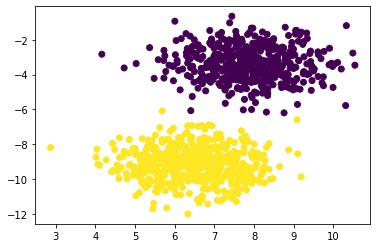

In [6]:
# Cargamos datos
# Trabajaremos con datos sintéticos

# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
# Generate isotropic Gaussian blobs for clustering
X, y = make_blobs(n_samples=1000, centers=2, n_features=2,random_state=6)

print(X[:5])
print(y[:5])

# Vamos a visualizar estos datos
plt.scatter(X[:,0], X[:,1], c=y)

In [7]:
# Separamos los datos de entreno como de evaluación
x_train, x_test,  y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 0)

In [8]:
print(x_train.shape)
print(y_train.shape)


(800, 2)
(800,)


In [9]:
# Entrenamos el modelo
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [10]:
# Predecimos valores con el subset reservado
y_pred = model.predict(x_test)

In [11]:
print(classification_report(y_test, y_pred))
print("-"*20)
print(model.score(X,y))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       113
           1       0.99      1.00      0.99        87

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200

--------------------
0.999


Además, el modelo nos proporciona la recta que separa ambas características:
- Pendiente: m = -A/B
- Ordenada en el origen: (0,-C/B)

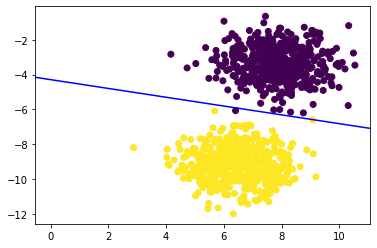

In [12]:
m = -model.coef_[0][0] / model.coef_[0][1] 
x1 = (0, -model.intercept_[0] / model.coef_[0][1]) #Nota: ¿Dónde se definen estos valores: coef_ y intercept_ ?
plt.scatter(X[:,0], X[:,1], c=y)
plt.axline(xy1=x1, slope=m,color="blue")

<span style="color:orange">**Actividad 5.1**</span><br/>Dada la siguiente muestras de datos reales, ¿dónde clasificarías cada una de ellas? ¿Qué accuracy se ha obtenido?
- Nota: en la documentación hay dos funciones: *predict* y *predic_proba*. ¿Qué diferencias hay aplicando cada una de ellas?

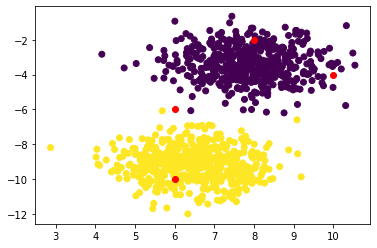

In [13]:
X_real = np.array([[6,-10],[6, -6],[8, -2],[10, -4]])
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(X_real[:,0],X_real[:,1],c="red")

[1 1 0 0]


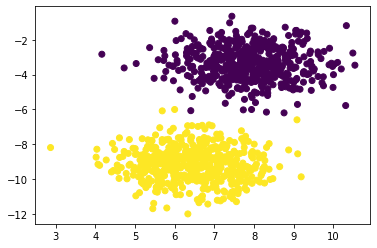

In [14]:
# Ejercicio 1
y_real_pred = model.predict(X_real)
print(y_real_pred)
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(X_real[:,0],X_real[:,1],c=y_real_pred)


<span style="color:orange">**Actividad 5.2**</span><br/> Calcula la matriz de confusión aplicando el método correspondiente: sklearn.metrics.confusion_matrix


In [55]:
# Ejercicio 2

## Algoritmo lineal: Support Vector Machine

https://en.wikipedia.org/wiki/Support_vector_machine


In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC


[[ 0.10049183  0.48800911]
 [-1.13103537  1.09946452]
 [-1.41857135 -0.86904789]
 [-0.57911797 -1.2615109 ]
 [-0.10760837 -2.13413139]]
[0 0 1 1 1]


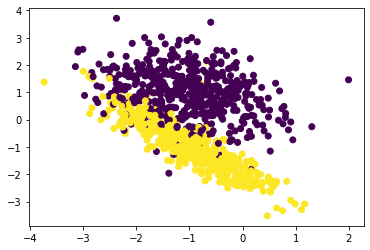

In [75]:
# Datos sintéticos
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2, 
                           random_state=2023, n_clusters_per_class=1)

print(X[:5])
print(y[:5])

plt.scatter(X[:,0],X[:,1],c=y)


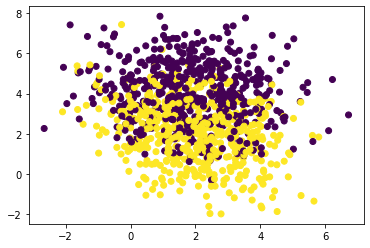

In [78]:
# Algo más de complejidad al proceso introduciendo "dispersión" en las muestras lo que nos generá mayor entrelazado de características entre clases
rng = np.random.RandomState(2023)
X += 3 * rng.uniform(size=X.shape)

plt.scatter(X[:,0],X[:,1],c=y)

<span style="color:orange">**Actividad 5.3**</span>


- Separa el conjunto de datos X e y en dos conjuntos: entrenamiento y test.
- Entrena una (SVM)[https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html] con el paràmetro C=0.0001.
- Muestra la matriz de confusión y calcula la precision (tp / (tp + fp)) en la clasificación.

In [ ]:
# Preparación de datos

In [ ]:
# Construcción del modelo y entreno

In [79]:
# Métricas

<span style="color:orange">**Actividad 5.4**</span><br/>
Analiza como se comporta el algoritmo variando el parámetro de regulación (C). Retoca el siguiente código para poder representar los segmentos de separación de clases entre cada valor.

In [ ]:
import matplotlib.cm as cm

Cs = [ 0.0001, 0.001,0.1, 1.0]
colors = cm.rainbow(np.linspace(0, 1, len(Cs)))

plt.figure(figsize=(16,4))

for idx, C in enumerate(Cs):
    
    model = LinearSVC(C=C, random_state=0)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    
    m = -model.coef_[0][0] / model.coef_[0][1]
    x1 = (0, -model.intercept_[0] / model.coef_[0][1])
    
    ax = plt.subplot(1, 4, idx + 1)  # Añadimos  la subfigura a una figura mas grande con cuatro columnas
    ax.set_title("C="+ str(C))
    ax.axline(xy1=x1, slope=m,color=colors[idx])
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors="k")

## Algoritmo lineal con multiclase: SVM 

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn import datasets

In [95]:
# https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [100]:
X = iris.data[:, :2]  # Cogemos dos características del conjunto de datos
y = iris.target

print(X.shape)
print("-"*20)
print(X[:5])
print("-"*20)
print(y[:5])

(150, 2)
--------------------
[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]
--------------------
[0 0 0 0 0]


<span style="color:orange">**Actividad 5.5**</span>
- Prepara los datos de entreno
- Aplica el algoritmo SVM para dar soporte a multiclase (busca dentro de la documentación de SVM!)
- Análizamos la calidad de los resultados: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

In [101]:
# TODO

## Hacia otros casos de clasificación multiclase

Vamos a trabajar con un problema multiclase más complejo; con datos reales. El objetivo es identificar el número através de una imagen. 

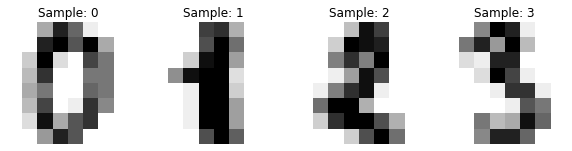

In [103]:
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Sample: %i' % label)

plt.show()

In [113]:
# ¿Cuál es la estructura de los datos?
print(type(digits)) # lista el tipo
print(dir(digits)) #lista todos los atributos y funciones directos asociados a una variable
print("-"*30)
print(digits.images[0])
print("-"*30)
print(digits.target[0])

<class 'sklearn.utils._bunch.Bunch'>
['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']
------------------------------
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
------------------------------
0


Como primer contacto con el problema usemos: regresión logística

<span style="color:orange">**Actividad 5.6**</span><br/>
- Prepara los datos y divide el conjunto de datos en un 70%
- Entrena el regresor logístico
- Muestra la matriz de confusión: ¿qué clases se confunden más?


In [130]:
# Preparación de datos y división para el entreno
# Atención: "X" suele ser un array y ahora es una matriz
# TIP: reshape(  ,  )


In [115]:
# Modelo y entreno

In [123]:
# Matriz de confusión 

## Clasificación no lineal

Básicamente, son instancias que no son separables linealmente.

- Modelos no lineales:
  - K-Nearest Neighbors K-NN / K-cercanos vecinos
  - Decision Tree / Árboles de decisión
  - Random Forest Classification
  - Multi-layer percentron (MLP)

Ejemplo de un K-NN:<br/>
<img src="images/KNN-figure.png" width="40%"/>

Ejemplo de un Random Forest Classifier:<br/>
<img src="images/Random_forest_diagram_complete.png" width="40%"/>


### SVM para problemas no lineales

Sobre SVM se pueden aplicar diferentes kernels, los más usados son aquellos polinómicos y el conocido como RBF ( Radial Basis Function).

**RBF**<br/>
Para usarlo necesitamos ajustar dos hiperparámetros: el ya conocido parámetro de regularización C y un segundo parámetro gamma, a mayor valor de este parámetro conduce a un límite de decisión más suave.

Para usar SVM no lineales en scikit con kernel RBF, lo haremos de la siguiente manera:

```python
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=1.0)
```

**Polinómico**<br/>
A efectos prácticos no es muy recomendable usar polinomios con grado mayor a 3, ya que corremos el riesgo de sobreajustar el clasificador a los datos y además el tiempo de entrenamiento crece.

```python
from sklearn.svm import SVC
svm = SVC(kernel='poly', random_state=0, gamma=0.10, C=1.0)
```


In [132]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings
import numpy as np
from sklearn.svm import SVC

In [151]:
##### ATENCION --- CODIGO PARA LA VISUALIZACIÓN DE LOS PRóXIMOS RESULTADOS!!!
##### No compete en esta asignatura
##### FUENTE: http://rasbt.github.io/mlxtend/

def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

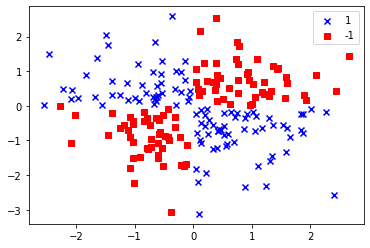

In [140]:
# Generación de datos sintéticos
np.random.seed(2023)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')


plt.legend(loc='best')
plt.show()

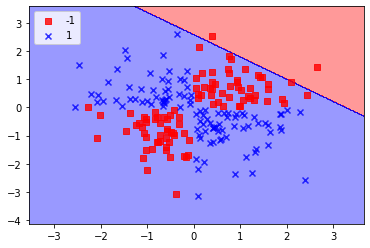

In [143]:
# Clasificación usando SVM lineal

svm = SVC(kernel='linear', C=1, random_state=0)
svm.fit(X_xor, y_xor)

plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

Clasificación con un kernel RBF<br/>

El kernel RBF tiene dos parámetros:

**gamma** es un parámetro del kernel RBF y se puede considerar como la "extensión" del kernel y, por tanto, la región de decisión. Cuando la gama es baja, la "curva" del límite de decisión es muy baja y, por tanto, la región de decisión es muy amplia. Cuando la gama es alta, la "curva" del límite de decisión es alta, lo que crea islas de límites de decisión en torno a los puntos de datos. Esto lo veremos muy claro a continuación.

**C** es un parámetro propio de las SVM y es la penalización por clasificar erróneamente una observación. Cuando C es pequeño, el clasificador está de acuerdo con los puntos de datos mal clasificados (alto sesgo, baja varianza). Cuando C es grande, el clasificador penaliza mucho los datos erróneamente clasificados y, por tanto, evita cualquier observación erróneamente clasificada (bajo sesgo, mayor varianza).

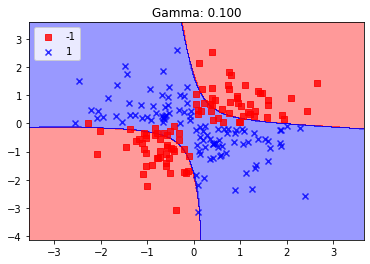

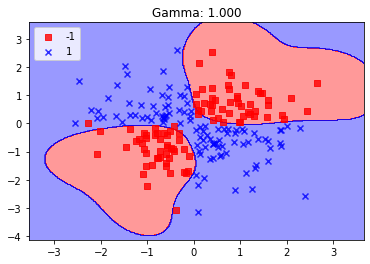

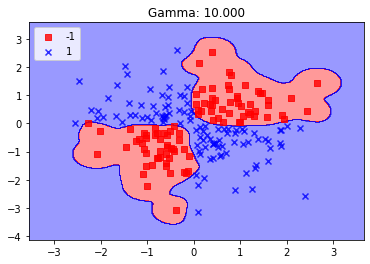

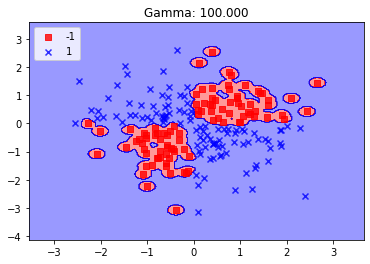

In [150]:
gamma = [.1,1,10,100]

for g in gamma:
    svm = SVC(kernel='rbf', random_state=0, gamma=g, C=1)
    # Train the classifier
    svm.fit(X_xor, y_xor)

    # Visualize the decision boundaries
    plot_decision_regions(X_xor, y_xor, classifier=svm)
    plt.legend(loc='upper left')
    plt.title("Gamma: %0.3f"%g)
    plt.show()

### K-Nearest Neighbors Classifier

Documentación: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py


### Decision Trees and Random Forest classifiers

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import export_text

iris = load_iris()
X, y = iris.data, iris.target
model = tree.DecisionTreeClassifier()
model = model.fit(X, y)

r = export_text(model, feature_names=iris['feature_names'])
print(r)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



<span style="color:orange">**Actividad 5.7**</span><br/>
El objetivo de este ejercicio es valorar las características de unos modelos de vehículos para conocer su calidad: *unaccuracy, accuracy, good, y very good*. Variable *class*.
- Carga y explora los datos del archivo: *data/car_evaluation.csv*.
- Prepara los datos (X,y) y separa para el entrenamiento
- Aplica RandomForest algorithm
  ```python
  from sklearn.ensemble import RandomForestClassifier
  rfc = RandomForestClassifier(random_state=0)
  ```
- Entrena 
- Comprueba su accuracy:
  ```python
  from sklearn.metrics import accuracy_score
  print("Model accuracy score : %0.4f" %accuracy_score(y_test, y_pred))
  ```
- ¿Cómo se comportan los resultados variando el número de árboles?
  En https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
  ```
  n_estimators : int, default=100
  The number of trees in the forest.
  ```

In [160]:
import pandas as pd
pathFile = "data/car_evaluation.csv"
df = pd.read_csv(pathFile)

print(df.shape)
print(df.describe())
print(df.head())


LabelEncoder()
